# PCA + Logistic Regression (MNIST)

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

    Parameters	              Number

    Classes	                  10

    Samples per class	      ~7000 samples per class

    Samples total	          70000

    Dimensionality	          784

    Features	              integers values from 0 to 255

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image
import matplotlib.image as mpimg
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

## Load the MNIST Dataset

In [2]:
mnist = pd.read_csv('mnist.csv')
mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Drop 'label' column

Each row contains the pixel values of one single image. The pixels which make the image can be considered as dimensions (columns/variables) of the image data. The ‘label’ column contains the values of the digit (0–9). We do not need that column for our analysis because PCA is an unsupervised machine learning task that does not deal with labelled data. So, we can simply drop that column.

In [3]:
mnist.drop(columns='label', inplace=True)
mnist.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist.shape

(60000, 784)

This dataset contains 60,000 images of 28x28 (784) pixels!

## Display an image

Let’s display the 2nd image (row) in the MNIST dataset. This image should contain the digit ‘0’ since the label column value of the 2nd row is ‘0’.

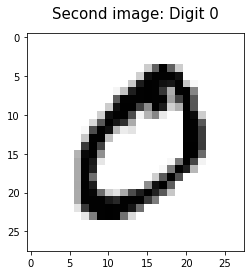

In [5]:
second_image = mnist.iloc[1].values.reshape([28,28])
plt.imshow(second_image, cmap='gray_r')
plt.title('Second image: Digit 0', fontsize=15, pad=15)
plt.savefig("Second image.png")

## Feature scaling

Since PCA directions are highly sensitive to the scale of the data, we must do feature scaling before applying PCA if the data is not measured on a similar scale.

In the MNIST dataset, the pixel values of each image are ranging from 0 to 255 (similar scale). For example:

In [6]:
#2nd image
print(mnist.iloc[1].min())
print(mnist.iloc[1].max())
#0
#255

0
255


Since our data is measured on a similar scale, we do not need to do feature scaling for PCA.

## Apply PCA

Choose the right number of dimensions.

First, we need to choose the right number of dimensions (i.e., the right number of principal components). For this, we apply PCA with the original number of dimensions (i.e., 784) and create the scree plot to see how well PCA captures the variance of the data.

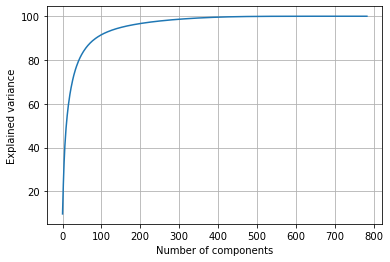

In [7]:
pca_784 = PCA(n_components=784)
pca_784.fit(mnist)

plt.grid()
plt.plot(np.cumsum(pca_784.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('Scree plot.png')

Let’s try using the first 10 components to compress the image. These components do not capture much of the variability in the original data. So, we will not get a clear image.

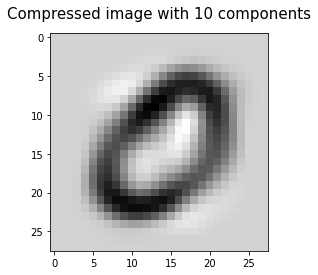

In [8]:
pca_10 = PCA(n_components=10)
mnist_pca_10_reduced = pca_10.fit_transform(mnist)
mnist_pca_10_recovered = pca_10.inverse_transform(mnist_pca_10_reduced)

image_pca_10 = mnist_pca_10_recovered[1,:].reshape([28,28])
plt.imshow(image_pca_10, cmap='gray_r')
plt.title('Compressed image with 10 components', fontsize=15, pad=15)
plt.savefig("image_pca_10.png")

Compare this with image 1 (original image) that we obtained earlier. This image is not very clear and it is lack of information.

Let’s try using the first 184 components to compress the image. About 96% variability in the original data is captured by the first 184 components. So, this time, we will get a very clear image much similar to the original one.

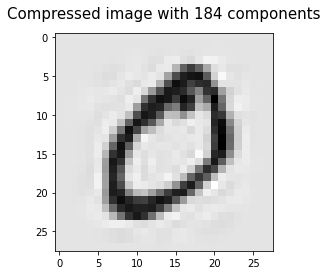

In [9]:
pca_184 = PCA(n_components=184)
mnist_pca_184_reduced = pca_184.fit_transform(mnist)
mnist_pca_184_recovered = pca_184.inverse_transform(mnist_pca_184_reduced)

image_pca_184 = mnist_pca_184_recovered[1,:].reshape([28,28])
plt.imshow(image_pca_184, cmap='gray_r')
plt.title('Compressed image with 184 components', fontsize=15, pad=15)
plt.savefig("image_pca_184.png")

We can also calculate the explained variance of 184 components:

In [10]:
np.cumsum(pca_184.explained_variance_ratio_ * 100)[-1]
#96.11980535398752

96.11998608956745

It is 96.1%.

Compare the compressed image with the original one:

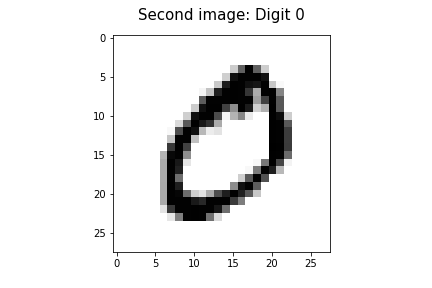

In [11]:
image = Image.open("Second image.png")
image

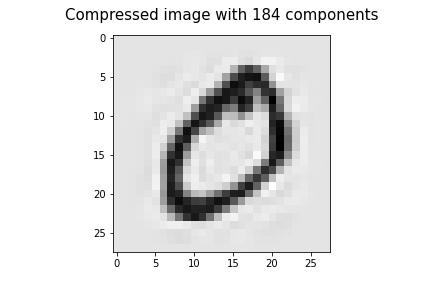

In [12]:
image2 = Image.open("image_pca_184.png")
image2

This is how we can use PCA for image compression. The image at the left is the original image with 784 dimensions. The image at the right is the compressed image with 184 dimensions. After applying PCA on image data, the dimensionality has been reduced by 600 dimensions while keeping about 96% of the variability in the original image data! By comparing these two images, you can see that there is a slight image quality loss, but the content of the compressed image is still visible!

# Another way to see the differences in image compression 

Make an instance of PCA

In [13]:
pca = PCA(.95)

Reduce the dimensionality of your data

In [14]:
lower_dimensional_data = pca.fit_transform(mnist)

In [15]:
pca.n_components_

154

The idea with going from 784 components to 154 is to reduce the running time of a supervised learning algorithm (in this case logistic regression) which we will see at the end of the tutorial. One of the cool things about PCA is that we can go from a compressed representation (154 components) back to an approximation of the original high dimensional data (784 components).

In [16]:
approximation = pca.inverse_transform(lower_dimensional_data)

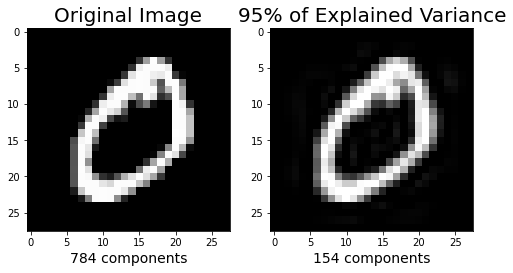

In [17]:
plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(mnist.iloc[1].values.reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[1].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('154 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20);

## Showing Graph of Explained Variance vs Number of Principal Components

In [18]:
# if n_components is not set all components are kept (784 in this case)
pca = PCA()

In [19]:
pca.fit(mnist)

PCA()

In [20]:
pca.n_components_

784

In [21]:
# Summing explained variance
tot = sum(pca.explained_variance_)
tot

3428502.574780175

In [22]:
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

[9.704664359713925, 7.095924059094509, 6.1690887623680934, 5.389419486553171, 4.868797023474807]


In [23]:
tot = sum(pca.explained_variance_)
tot

3428502.574780175

In [24]:
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

[9.704664359713925, 7.095924059094509, 6.1690887623680934, 5.389419486553171, 4.868797023474807]


In [25]:
# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp) 

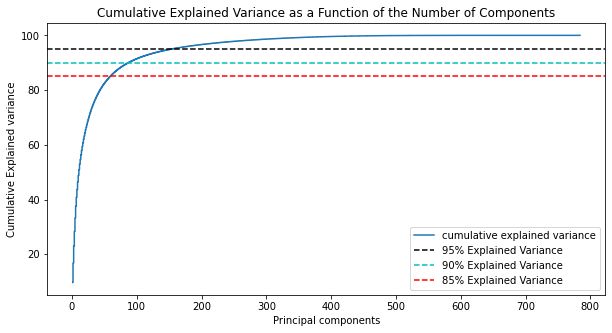

In [26]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.step(range(1, 785), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

## Number of Principal Components for 99%, 95%, 90%, and 85% of Explained Variance

In [27]:
# Indices corresponding to the first occurrence are returned with the np.argmax function
# Adding 1 to the end of value in list as principal components start from 1 and indexes start from 0 (np.argmax)
componentsVariance = [784, np.argmax(cum_var_exp > 99) + 1, np.argmax(cum_var_exp > 95) + 1,
                      np.argmax(cum_var_exp > 90) + 1, np.argmax(cum_var_exp >= 85) + 1]

In [28]:
componentsVariance

[784, 331, 154, 87, 59]

In [29]:
# This is an extremely inefficient function. Will get to why in a later tutorial
def explainedVariance(percentage, images): 
    # percentage should be a decimal from 0 to 1 
    pca = PCA(percentage)
    pca.fit(images)
    components = pca.transform(images)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal

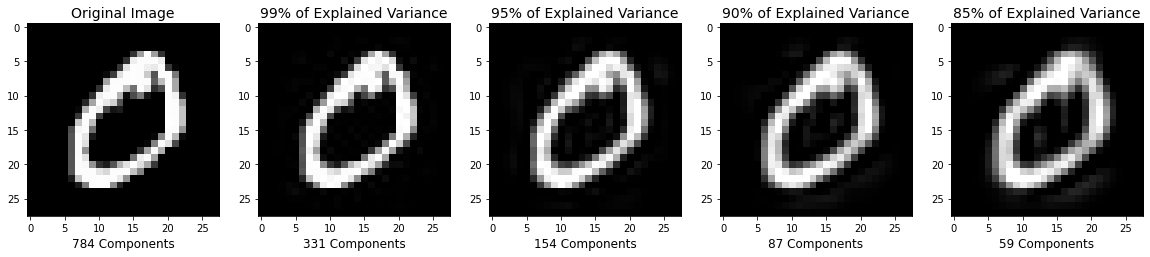

In [30]:
plt.figure(figsize=(20,4));

# Original Image (784 components)
plt.subplot(1, 5, 1);
plt.imshow(mnist.iloc[1].values.reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 Components', fontsize = 12)
plt.title('Original Image', fontsize = 14);

# 331 principal components
plt.subplot(1, 5, 2);
plt.imshow(explainedVariance(.99, mnist)[1].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('331 Components', fontsize = 12)
plt.title('99% of Explained Variance', fontsize = 14);

# 154 principal components
plt.subplot(1, 5, 3);
plt.imshow(explainedVariance(.95, mnist)[1].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('154 Components', fontsize = 12)
plt.title('95% of Explained Variance', fontsize = 14);

# 87 principal components
plt.subplot(1, 5, 4);
plt.imshow(explainedVariance(.90, mnist)[1].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('87 Components', fontsize = 12)
plt.title('90% of Explained Variance', fontsize = 14);

# 59 principal components
plt.subplot(1, 5, 5);
plt.imshow(explainedVariance(.85, mnist)[1].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('59 Components', fontsize = 12)
plt.title('85% of Explained Variance', fontsize = 14);